# Importation des données

In [172]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("car_insurance.csv", low_memory=False)
except BaseException:
    print("try with encoding error = ignore")
    df = pd.read_csv("car_insurance.csv", low_memory=False, encoding_errors="ignore")

print(df.columns)
print("nombre de lignes : " + str(len(df.index)))

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')
nombre de lignes : 10000


# Examen des données
Les données “driving_experience”, “education”, “income”, “vehicle_year”, “vehicle_type” sont des données qualitatives et devront être transformées afin d’être traitées

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'credit_score'}>],
       [<AxesSubplot:title={'center':'vehicle_ownership'}>,
        <AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'postal_code'}>],
       [<AxesSubplot:title={'center':'annual_mileage'}>,
        <AxesSubplot:title={'center':'speeding_violations'}>,
        <AxesSubplot:title={'center':'duis'}>,
        <AxesSubplot:title={'center':'past_accidents'}>],
       [<AxesSubplot:title={'center':'outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

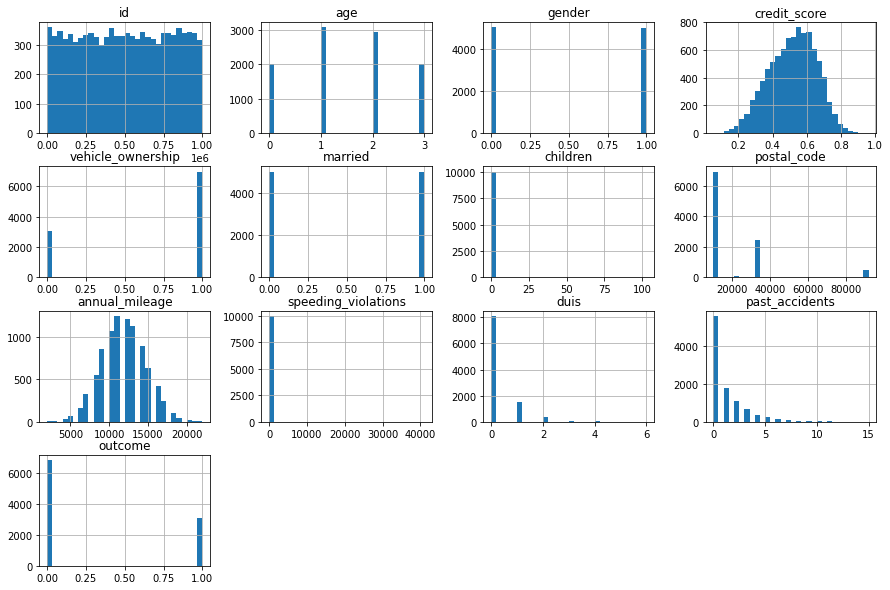

In [173]:
print(df.isna().sum())
df.hist(bins=30, figsize=(15, 10))

# Préparation des données
Pour les données manquantes des colonnes “credit_score” et “annual_mileage” on remplace les valeurs manquantes par la médiane de leur colonne car elle ne représentent pas plus d'un tiers de l'échantillon auquel cas nous les aurions suppriméees.

In [174]:
#Traitement des données manquantes
#Attention à run all code à chaque fois sinon ce qu'on souhaite montrer "disparaît"
#Lorsque run cellule par cellule Jupyter garde en mémoire la valeur du dernier run par cellule et non pas celui du dernier run all
print(df.isna().sum())
for col in df:
    if col == 'credit_score' or col == 'annual_mileage':
        df[col] = df[col].fillna(df[col].median())
print(df.isna().sum())

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


Même chose pour les données aberrantes: remplacement par la valeurde la médiane

array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'speeding_violations'}>]],
      dtype=object)

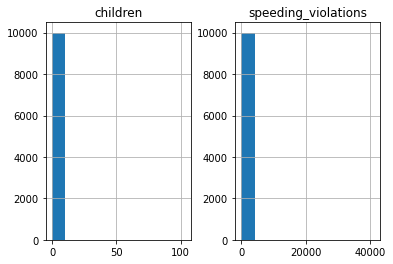

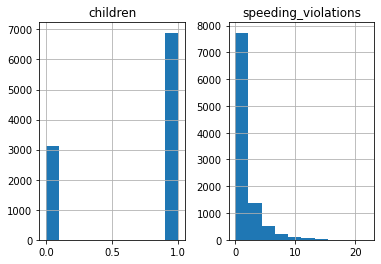

In [175]:
#Traitement des données aberrantes
df.hist(column=['children','speeding_violations'])
df.loc[df.children > 20, 'children'] = df['children'].median()
df.loc[df.speeding_violations > 30, 'speeding_violations'] = df['speeding_violations'].median()
df.hist(column=['children','speeding_violations'])

Suppression des colonnes qui ne sont pas intéressantes pour la résolution du problème de classification
Nous supprimerons la colonne "id" qui n'est pas pertinente pour notre classification

In [176]:
df = df.drop(columns=['id'])

Pour la transformation des variables qualitatives en variables numériques:
- driving_experience: 0: entre 0 et 9 ans d'expérience, 1: entre 10 et 19 ans d'expérience, 2: entre 20 et 29 ans d'expérience, 3: plus de 30 ans d'expérience
- education: 0: aucune, 1: lycée, 2: université
- income: 0: pauvreté, 1: classe ouvrière, 2: classe moyenne, 3: classe supérieure
- vehicle_year: 0: avant 2015, 1: après 2015
- vehicle_type: 0: sedan, 1: voiture de sport

In [177]:
print("Avant transformation:")
print(df.driving_experience.unique())
print(df.education.unique())
print(df.income.unique())
print(df.vehicle_year.unique())
print(df.vehicle_type.unique())

label_encoder = LabelEncoder()

print("Après transformation:")
#driving_experience
label_encoder.fit(df['driving_experience'])
df['driving_experience'] = label_encoder.transform(df['driving_experience'])
print(df.driving_experience.unique())

#education
label_encoder.fit(df['education'])
df['education'] = label_encoder.transform(df['education'])
print(df.education.unique())

#income
label_encoder.fit(df['income'])
df['income'] = label_encoder.transform(df['income'])
print(df.income.unique())

#vehicle_year
label_encoder.fit(df['vehicle_year'])
df['vehicle_year'] = label_encoder.transform(df['vehicle_year'])
print(df.vehicle_year.unique())

#vehicle_type
label_encoder.fit(df['vehicle_type'])
df['vehicle_type'] = label_encoder.transform(df['vehicle_type'])
print(df.vehicle_type.unique())

Avant transformation:
['0-9y' '10-19y' '20-29y' '30y+']
['high school' 'none' 'university']
['upper class' 'poverty' 'working class' 'middle class']
['after 2015' 'before 2015']
['sedan' 'sports car']
Après transformation:
[0 1 2 3]
[0 1 2]
[2 1 3 0]
[0 1]
[0 1]


# Recherche de corrélations


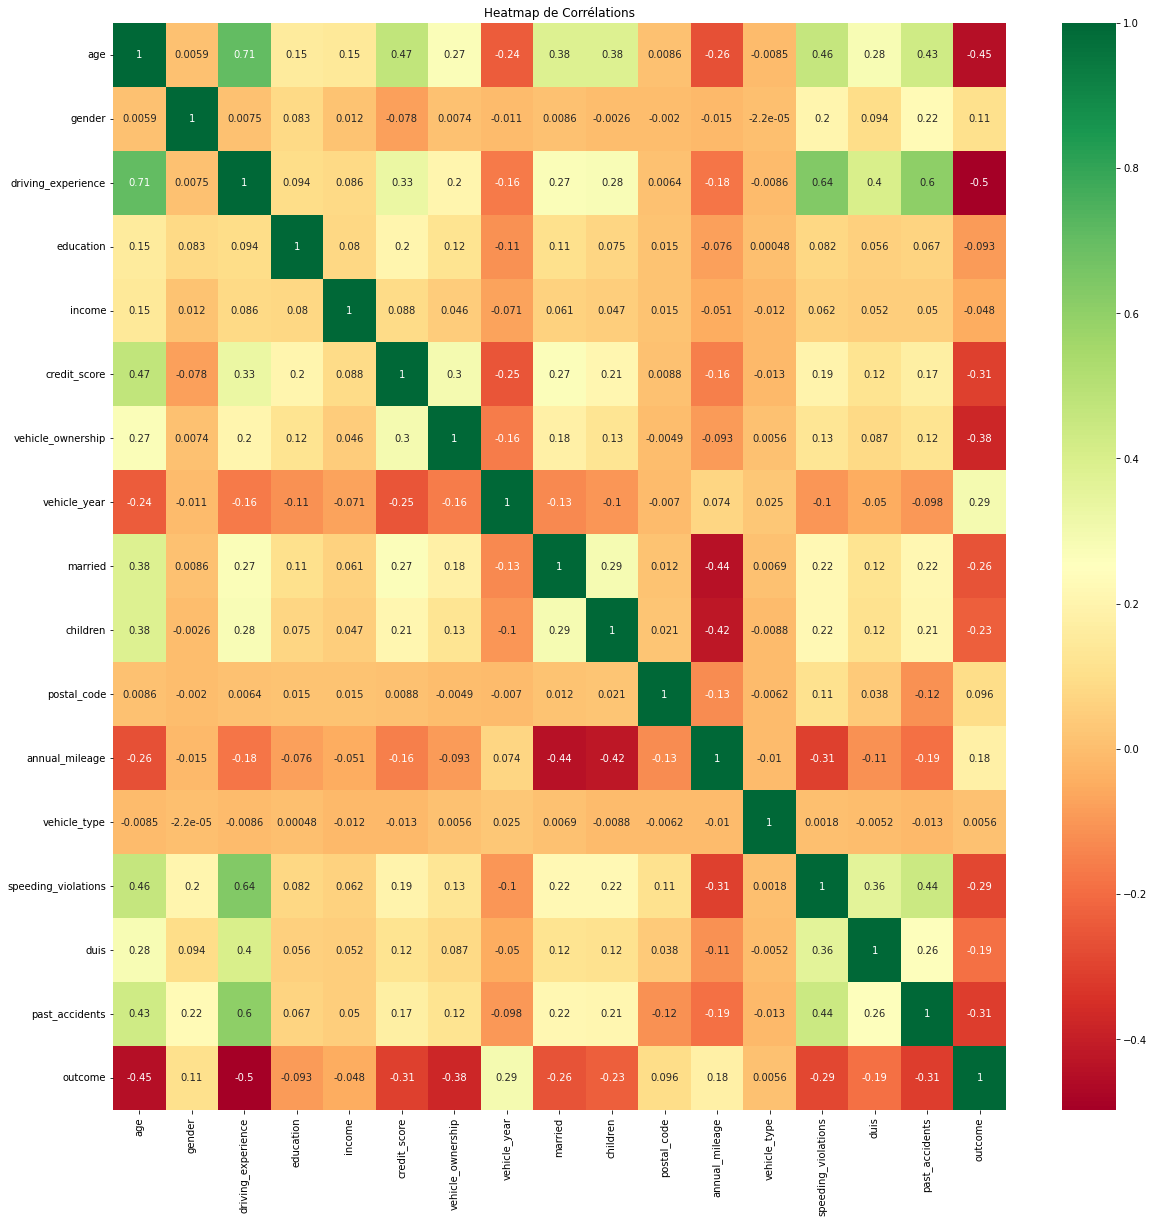

In [178]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
# Créer la heatmap
sns.heatmap(correlations, annot=True, cmap='RdYlGn', ax=ax)

# Ajouter le titre
plt.title('Heatmap de Corrélations')


# Afficher la heatmap
plt.show()